<a href="https://colab.research.google.com/github/frohlich71/confusion-matrix/blob/main/CalculoDeMetricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
tf.__version__

'2.15.0'

In [5]:
%load_ext tensorboard

In [6]:
logdir = 'log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

train_images, test_images = train_images / 255.0, test_images / 255.0

claseses=[0,1,2,3,4,5,6,7,8,9]

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1518 - accuracy: 0.9534 - val_loss: 0.0476 - val_accuracy: 0.9841
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0372 - val_accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0269 - val_accuracy: 0.9919


In [12]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=1)

313/313 [==============================] - 3s 8ms/step


In [13]:
classes=[0,1,2,3,4,5,6,7,8,9]

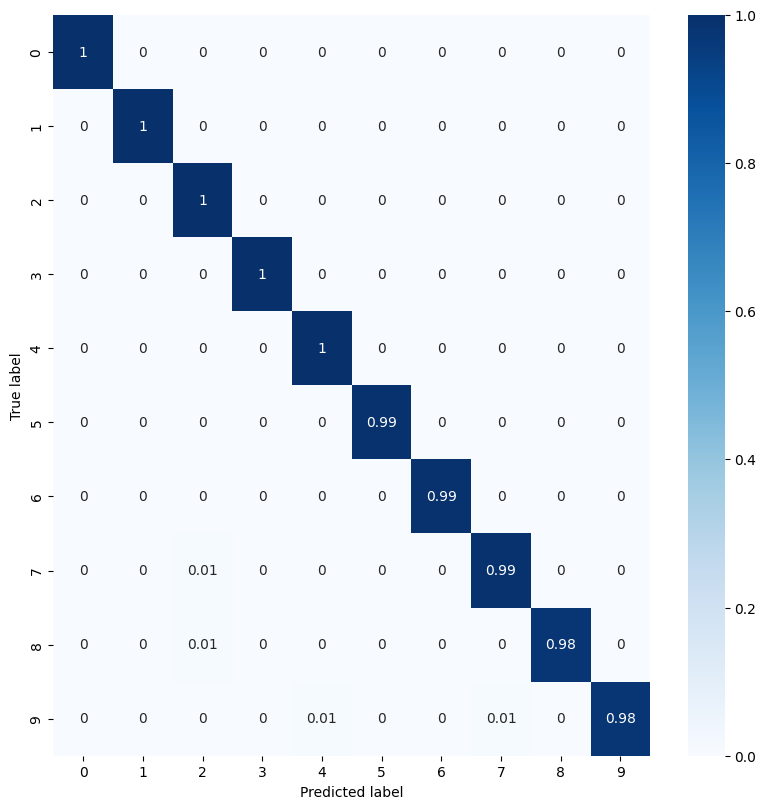

In [57]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns = classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

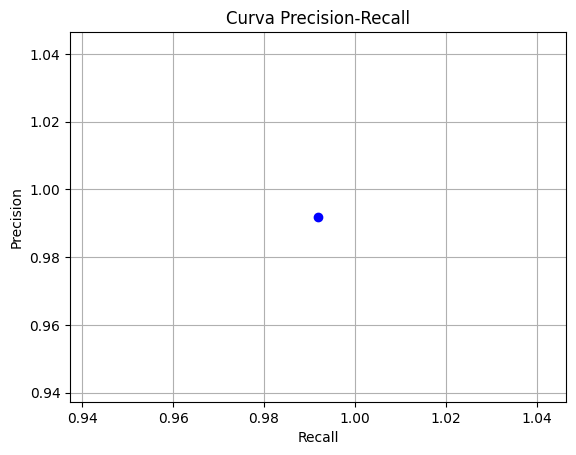

In [61]:
from sklearn.metrics import roc_curve, auc


accuracy = (con_mat.diagonal().sum() / con_mat.sum())
recall = (con_mat.diagonal().sum() / con_mat.sum())
precision = (con_mat.diagonal().sum() / con_mat.sum())
F_measure = ((2 * (recall * precision)) / (recall + precision))


plt.plot(recall, precision, marker='o', linestyle='-', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

print(con_mat_norm.diagonal().sum() / con_mat.sum())
#validando utilizando funções do sklearn
# print(recall_score(y_true, y_pred, average="micro"))
# print(precision_score(y_true, y_pred, average="micro"))
# print(f1_score(y_true, y_pred, average="micro"))



0.000993
